In [1]:
from neurodiffeq.conditions import BundleIVP
from neurodiffeq.solvers import BundleSolver1D

import matplotlib.pyplot as plt
import numpy as np
import torch
from neurodiffeq import diff

In [2]:
T_MIN, T_MAX = 0, 1
LAMBDA_MIN, LAMBDA_MAX = 3, 5  # first parameter,  index = 0
U0_MIN, U0_MAX = 0.2, 0.6       # second parameter, index = 1

In [3]:
# equation parameters comes after inputs (usually temporal and spatial coordinates)
diff_eq = lambda u, t, lmd: [diff(u, t) + lmd * u]

# The keyword argument must be named "u_0" in BundleIVP. If you use anything else, e.g. `y0`, `u0`, etc., it won't work.
conditions = [
    BundleIVP(t_0=0, u_0=None, bundle_param_lookup={'u_0': 1})  # u_0 has index 1
]

solver = BundleSolver1D(
    ode_system=diff_eq,
    conditions=conditions,
    t_min=T_MIN, t_max=T_MAX, 
    theta_min=[LAMBDA_MIN, U0_MIN],  # λ has index 0; u_0 has index 1
    theta_max=[LAMBDA_MAX, U0_MAX],  # λ has index 0; u_0 has index 1
    eq_param_index=(0,),             # λ is the only equation parameter, which has index 0
    n_batches_valid=1,
)

In [4]:
solver.fit(max_epochs=1000)
solution = solver.get_solution(best=True)

Training Progress:   0%|                               | 0/1000 [00:00<?, ?it/s]

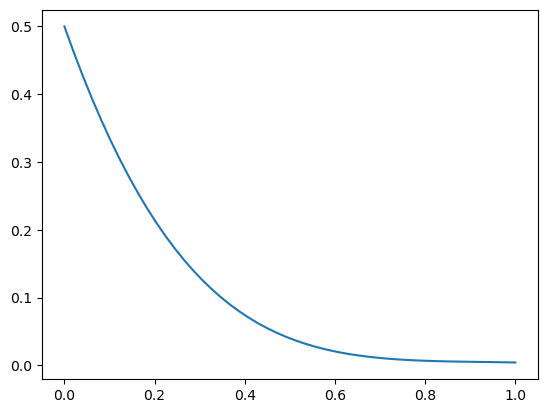

In [8]:
t = np.linspace(0, 1)
lmd = 5 * np.ones_like(t)
u0 = 0.5 * np.ones_like(t)

u = solution(t, lmd, u0, to_numpy=True)

import matplotlib.pyplot as plt
plt.plot(t, u)

In [31]:
# observed data points
t_obs = torch.tensor([0.2, 0.5, 0.8]).reshape(-1, 1)
u_obs = torch.tensor([0.273, 0.129, 0.0609]).reshape(-1, 1)

# random intialization of λ and U0; keep track of their gradient
lmd_tensor = torch.rand(1) * (LAMBDA_MAX - LAMBDA_MIN) + LAMBDA_MIN
u0_tensor = torch.rand(1) * (U0_MAX - U0_MIN) + U0_MIN
adam = torch.optim.Adam([lmd_tensor.requires_grad_(True), u0_tensor.requires_grad_(True)], lr=1e-2)

# run gradient descent for 10000 epochs
for _ in range(10000):
    output = solution(t_obs, lmd_tensor * torch.ones_like(t_obs), u0_tensor * torch.ones_like(t_obs))
    loss = ((output - u_obs) ** 2).mean()
    loss.backward()
    adam.step()
    adam.zero_grad()
   
print(f"λ = {lmd_tensor.item()}, U0={u0_tensor.item()}, loss = {loss.item()}")

λ = 2.5950618877567844, U0=0.509471313957643, loss = 3.28462329808618e-05


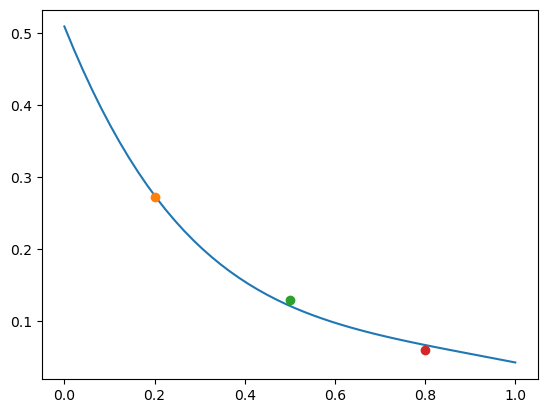

In [32]:
t = np.linspace(0, 1)
lmd = lmd_tensor.item() * np.ones_like(t)
u0 = u0_tensor.item() * np.ones_like(t)

u = solution(t, lmd, u0, to_numpy=True)

import matplotlib.pyplot as plt
plt.plot(t, u)
plt.plot(0.2,0.273,'o')
plt.plot(0.5,0.129,'o')
plt.plot(0.8,0.0609,'o')

In [58]:
T_MIN, T_MAX = 1, 5
U0_MIN, U0_MAX = -2.0, 2.0 # second parameter, index = 0

In [64]:
# equation parameters comes after inputs (usually temporal and spatial coordinates)
diff_eq = lambda lamb, nu, t: [torch.exp(-lamb)*((diff(nu,t)/t) + 1/torch.pow(t, 2)) - 1/torch.pow(t, 2), torch.exp(-lamb)*((diff(lamb,t)/t) - 1/torch.pow(t, 2)) + 1/torch.pow(t, 2)]

# The keyword argument must be named "u_0" in BundleIVP. If you use anything else, e.g. `y0`, `u0`, etc., it won't work.
conditions = [
    BundleIVP(t_0=1, u_0=None, bundle_param_lookup={'u_0': 0}),  # u_0 has index 1
    BundleIVP(t_0=1, u_0=None, bundle_param_lookup={'u_0': 0})  # u_0 has index 1
]

solver = BundleSolver1D(
    ode_system=diff_eq,
    conditions=conditions,
    t_min=T_MIN, t_max=T_MAX, 
    theta_min=[U0_MIN, U0_MIN],  # λ has index 0; u_0 has index 1
    theta_max=[U0_MAX, U0_MAX],  # λ has index 0; u_0 has index 1
    eq_param_index=(),             # λ is the only equation parameter, which has index 0
    n_batches_valid=1,
)

In [67]:
solver.fit(max_epochs=10000)
solution = solver.get_solution(best=True)

Training Progress:   0%|                              | 0/10000 [00:00<?, ?it/s]

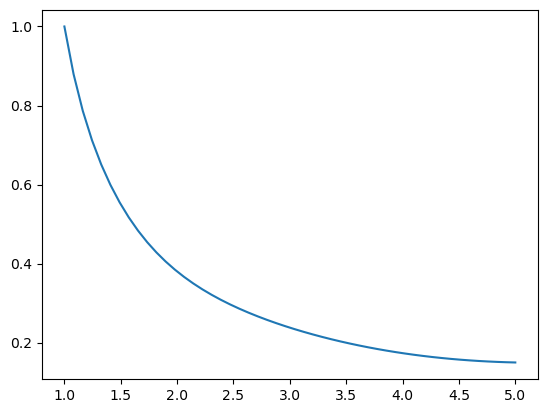

In [68]:
t = np.linspace(1, 5)
u0 = 1.0 * np.ones_like(t)
u1 = -1.0 * np.ones_like(t)

lamb_nn, nu_nn = solution(t, u0, u1, to_numpy=True)

import matplotlib.pyplot as plt
plt.plot(t, lamb_nn)

In [52]:
u

[array([0.98611133, 0.98724926, 0.98832784, 0.98934927, 0.99031563,
        0.99122896, 0.99209121, 0.99290428, 0.99366998, 0.99439006,
        0.99506621, 0.99570006, 0.99629319, 0.99684711, 0.99736327,
        0.9978431 , 0.99828794, 0.99869912, 0.99907788, 0.99942546,
        0.99974304, 1.00003174, 1.00029268, 1.0005269 , 1.00073544,
        1.00091928, 1.00107938, 1.00121667, 1.00133203, 1.00142634,
        1.00150042, 1.00155509, 1.00159112, 1.00160927, 1.00161028,
        1.00159486, 1.00156368, 1.00151741, 1.0014567 , 1.00138216,
        1.0012944 , 1.00119401, 1.00108154, 1.00095754, 1.00082255,
        1.00067707, 1.0005216 , 1.00035663, 1.00018261, 1.        ]),
 array([-0.73525435, -0.74345183, -0.75148923, -0.75937059, -0.76709979,
        -0.7746806 , -0.78211662, -0.78941137, -0.7965682 , -0.80359037,
        -0.81048101, -0.81724314, -0.82387967, -0.83039339, -0.83678701,
        -0.84306313, -0.84922424, -0.85527277, -0.86121101, -0.86704121,
        -0.87276552, -0.87